In [1]:
%matplotlib notebook

import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [1]:
#variables = ['nTrackJetsOR', 'MV1cB1_cont', 'MV1cB2_cont', 'mBB', 'dRBB', 'pTB1',
 #            'pTB2', 'MET', 'dPhiVBB','dPhiLBmin', 'Mtop', 'dYWH', 'mTW', 'pTV']

variables = ['pTB1','pTB2']

dfEven = pd.read_csv('Datasets/VHbb_data_2jet_even.csv')
dfOdd = pd.read_csv('Datasets/VHbb_data_2jet_odd.csv')

df = pd.concat([dfEven,dfOdd])

#dfTrain = df.loc[df['category'] == 'ttbar_mc_a']
dfTrain = df.loc[df['category'] == 'VH']
x_train_array = dfTrain[variables].to_numpy()


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_array)

print(len(x_train))

NameError: name 'pd' is not defined

batch_size = 64
steps_per_epoch = int(len(dfTrain) / batch_size)
epochs = 10000

noise_dim = 100

#optimizer = Adam(0.0001, 0.5)
optimizer = SGD(0.01)

#dataStorage = np.zeros((500, 7))



start = time.time()

def create_generator():
    generator = Sequential()
    
    generator.add(Dense(10, input_dim=noise_dim))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(20))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(10))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(8))
    generator.add(LeakyReLU(0.2))
    
   

    generator.add(Dense(len(variables), activation='tanh'))
    
    generator.compile(loss='mean_squared_error', optimizer=optimizer)
    return generator


def create_descriminator():
    discriminator = Sequential()
     
    discriminator.add(Dense(4, input_dim=len(variables)))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(8))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(8))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator


<IPython.core.display.Javascript object>


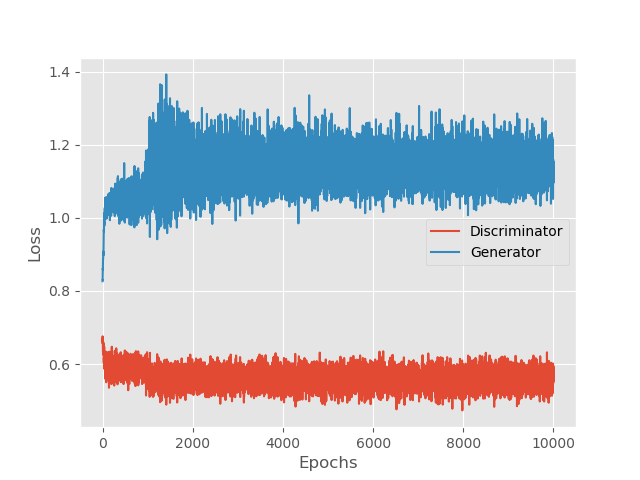

In [2]:
loss = pd.read_csv("ThisIsLossAgain.csv")
plt.style.use('ggplot')
plt.figure()
plt.plot(loss['discriminator'], label = "Discriminator")
plt.plot(loss['generator'], label = "Generator")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();




noise dim = 10
def create_generator():
    generator = Sequential()
    
    generator.add(Dense(10, input_dim=noise_dim))
    generator.add(LeakyReLU(0.2))

    #generator.add(Dense(20))
    #generator.add(LeakyReLU(0.2))

    generator.add(Dense(10))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(10))
    generator.add(LeakyReLU(0.2))
    
   

    generator.add(Dense(len(variables), activation='tanh'))
    
    generator.compile(loss='mean_squared_error', optimizer=optimizer)
    return generator
    
    
    
    
def create_descriminator():
    discriminator = Sequential()
     
    discriminator.add(Dense(4, input_dim=len(variables)))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(10))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(100))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator    

<IPython.core.display.Javascript object>


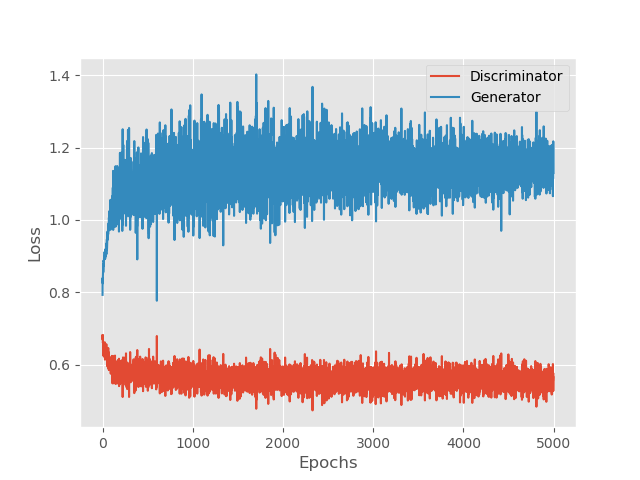

In [2]:
loss = pd.read_csv("ThisIsLossAgain2.csv")
plt.style.use('ggplot')
plt.figure()
plt.plot(loss['discriminator'], label = "Discriminator")
plt.plot(loss['generator'], label = "Generator")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

optimizer = Adam(0.0002, 0.5)

<IPython.core.display.Javascript object>


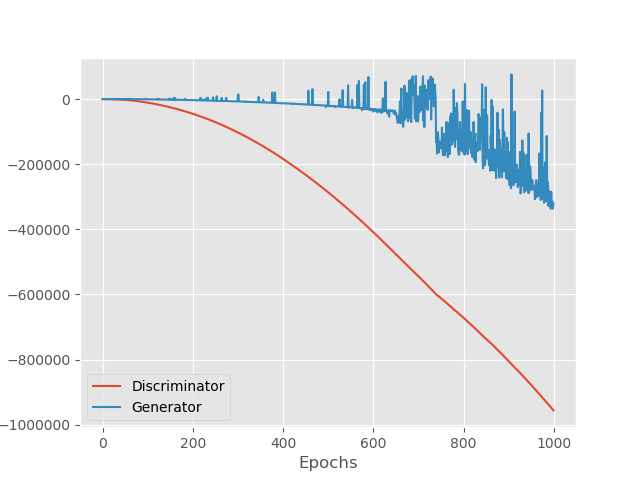

In [4]:
loss = pd.read_csv("ThisIsLossAgain3.csv")
plt.style.use('ggplot')
plt.figure()
plt.plot(loss['discriminator'], label = "Discriminator")
plt.plot(loss['generator'], label = "Generator")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

<IPython.core.display.Javascript object>


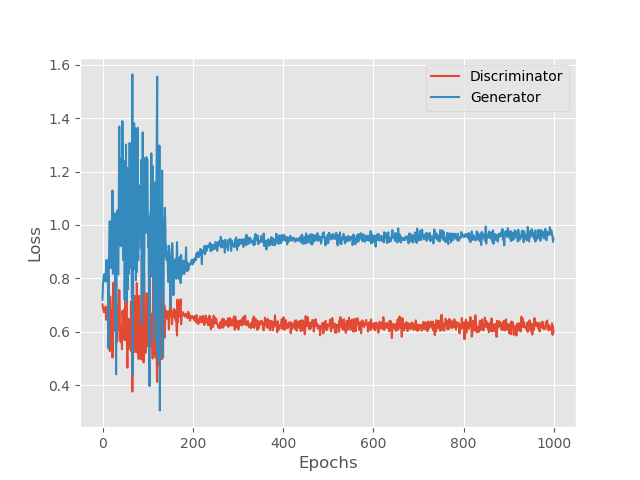

In [3]:
loss = pd.read_csv("ThisIsLossSimple.csv")
plt.style.use('ggplot')
plt.figure()
plt.plot(loss['discriminator'], label = "Discriminator")
plt.plot(loss['generator'], label = "Generator")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

<IPython.core.display.Javascript object>


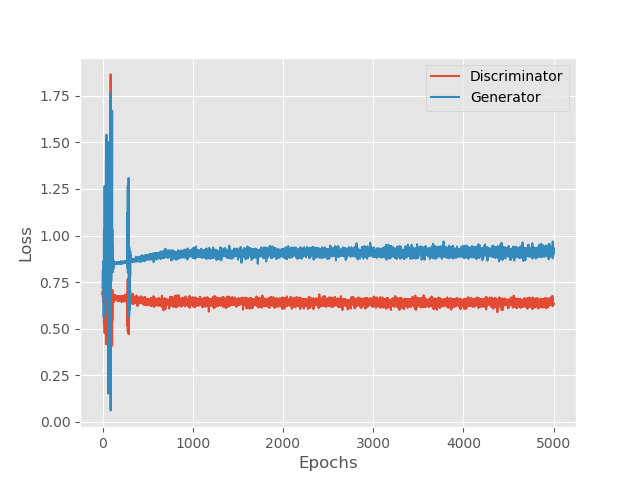

In [2]:
loss = pd.read_csv("ThisIsLossSimpleLong.csv")
plt.style.use('ggplot')
plt.figure()
plt.plot(loss['discriminator'], label = "Discriminator")
plt.plot(loss['generator'], label = "Generator")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [8]:
pTB = pd.read_csv("GeneratedEvents.csv")

variables = ['pTB1','pTB2']

dfEven = pd.read_csv('Datasets/VHbb_data_2jet_even.csv')
dfOdd = pd.read_csv('Datasets/VHbb_data_2jet_odd.csv')

Real = pd.concat([dfEven,dfOdd])
Real_pTB1 = Real.loc[Real['category'] == 'VH']['pTB1']
Real_pTB2 = Real.loc[Real['category'] == 'VH']['pTB2']


<IPython.core.display.Javascript object>


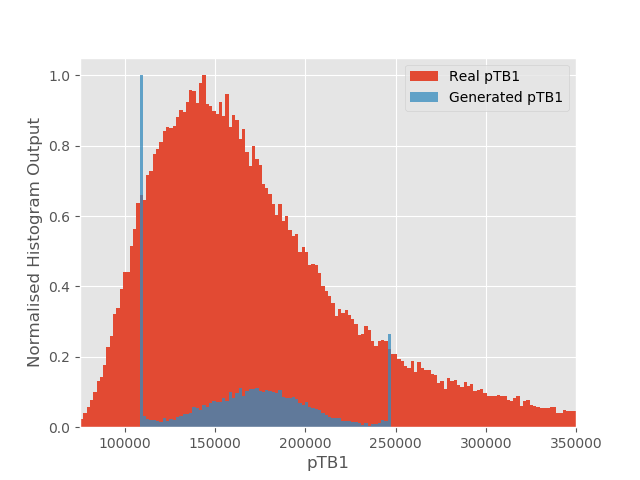

Text(0, 0.5, 'Normalised Histogram Output')

In [8]:
xrange, yrange =75000,350000

num_bin = 150
bin_lims = np.linspace(xrange,yrange,num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

hist1, _ = np.histogram(Real_pTB1, bins = bin_lims)
hist2, _ = np.histogram(pTB['0'], bins = bin_lims)
            
hist_real = hist1/np.max(hist1)
hist_gen = hist2/np.max(hist2)

plt.figure()
    
    
plt.bar(bin_centers, hist_real, width = bin_widths, align = 'center', alpha = 1,
        label = "Real pTB1")

plt.bar(bin_centers, hist_gen, width = bin_widths, align = 'center', alpha = 0.75,
        label = "Generated pTB1")

plt.legend()
plt.xlim(xrange,yrange);
plt.xlabel('pTB1')
plt.ylabel("Normalised Histogram Output")

<IPython.core.display.Javascript object>


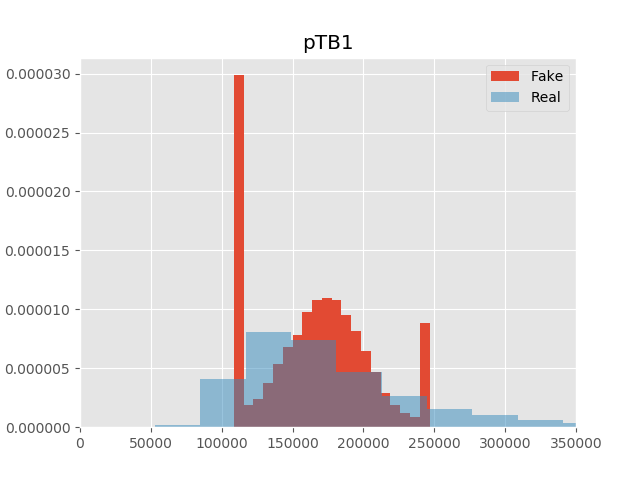

Text(0.5, 1.0, 'pTB1')

In [9]:
plt.figure()
plt.hist(pTB["0"], density = True, label = "Fake", bins = 20);
plt.hist(Real_pTB1, density = True, label = "Real", bins = 40, alpha = 0.5);
plt.legend()
plt.xlim(0,350000)
plt.title("pTB1")

<IPython.core.display.Javascript object>


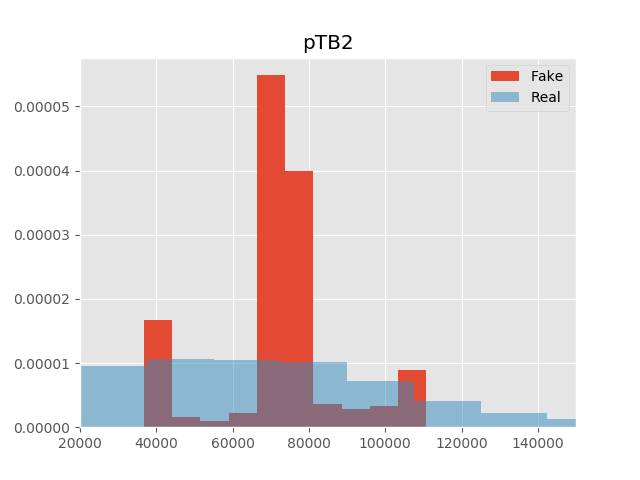

Text(0.5, 1.0, 'pTB2')

In [10]:
plt.figure()
plt.hist(pTB["1"], density = True, label = "Fake", bins = 10);
plt.hist(Real_pTB2, density = True, label = "Real", bins = 40, alpha = 0.5);
plt.legend()
plt.xlim(20000,150000)
plt.title("pTB2")

<IPython.core.display.Javascript object>


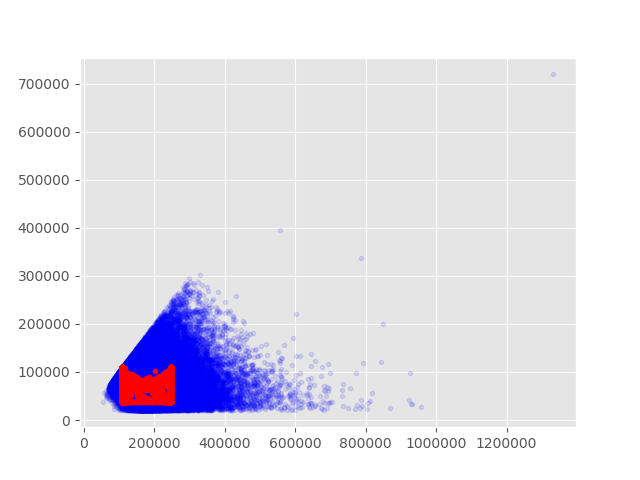

In [12]:
plt.figure()

plt.plot(Real_pTB1, Real_pTB2, "b.", alpha = 0.1)
plt.plot(pTB['0'],pTB['1'], "r.")

<IPython.core.display.Javascript object>


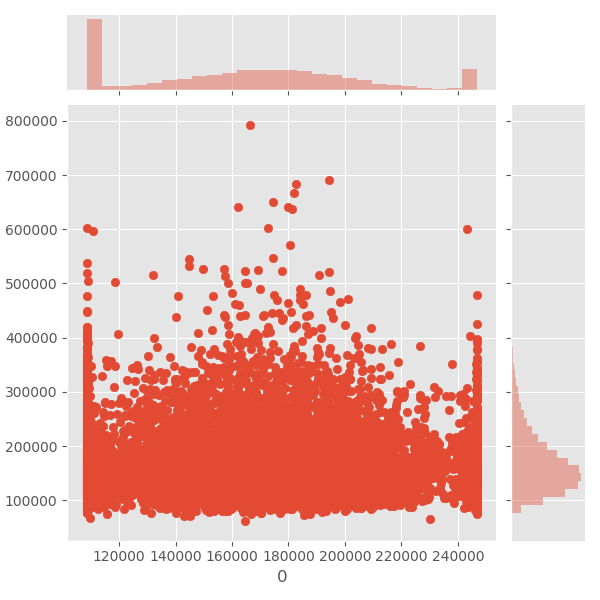

In [65]:
sns.jointplot(pTB['0'], Real_pTB1.head(10000))

<IPython.core.display.Javascript object>


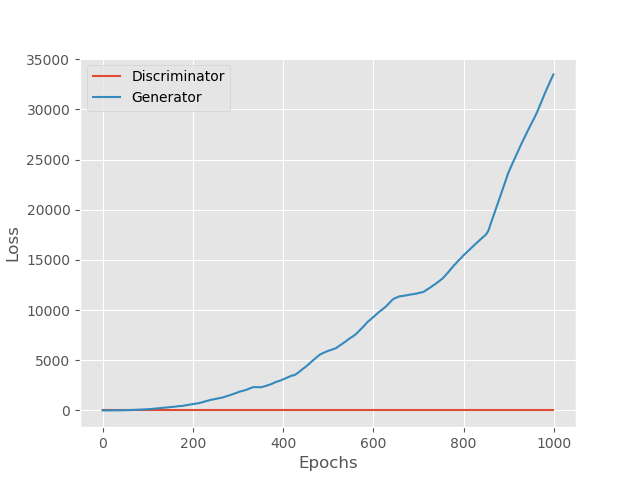

In [4]:
loss = pd.read_csv("ThisIsLossAgainWasserstein.csv")
plt.style.use('ggplot')
plt.figure()
plt.plot(loss['discriminator'], label = "Discriminator")
plt.plot(loss['generator'], label = "Generator")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [5]:
WpTB = pd.read_csv("GeneratedEvents.csv")

variables = ['pTB1','pTB2']

dfEven = pd.read_csv('Datasets/VHbb_data_2jet_even.csv')
dfOdd = pd.read_csv('Datasets/VHbb_data_2jet_odd.csv')

Real = pd.concat([dfEven,dfOdd])
Real_pTB1 = Real.loc[Real['category'] == 'VH']['pTB1']
Real_pTB2 = Real.loc[Real['category'] == 'VH']['pTB2']

<IPython.core.display.Javascript object>


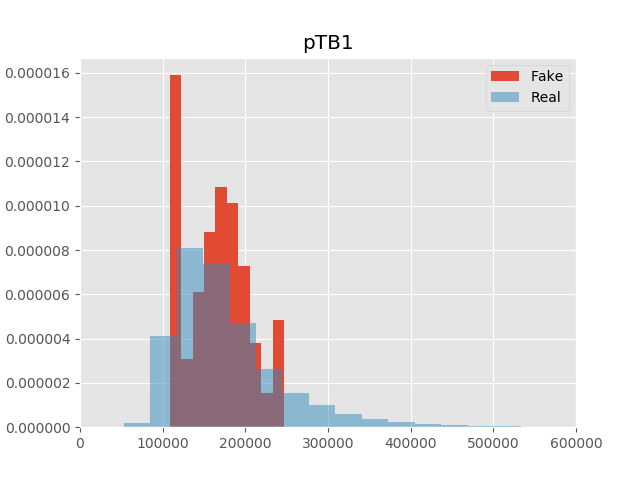

Text(0.5, 1.0, 'pTB1')

In [19]:
plt.figure()
plt.hist(WpTB["0"], density = True, label = "Fake", bins = 10);
plt.hist(Real_pTB1, density = True, label = "Real", bins = 40, alpha = 0.5);
plt.legend()
plt.xlim(0,600000)
plt.title("pTB1")

<IPython.core.display.Javascript object>


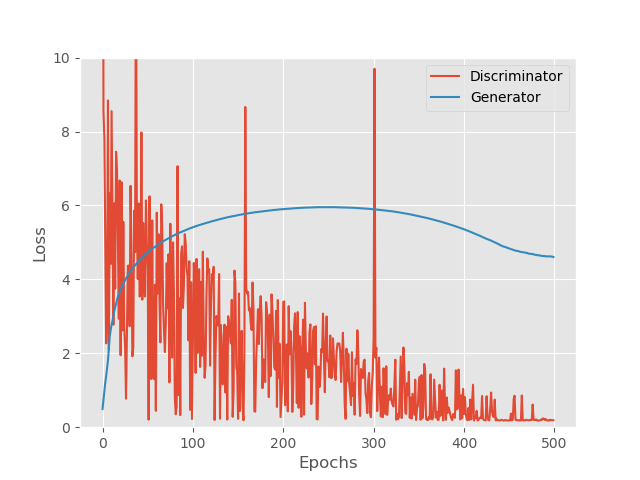

In [31]:
loss = pd.read_csv("ThisIsLossSimpleUnscaled.csv")
plt.style.use('ggplot')
plt.figure()
plt.plot(loss['discriminator'], label = "Discriminator")
plt.plot(loss['generator'], label = "Generator")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.ylim(0,10)
plt.legend();

In [32]:
UnscaledpTB = pd.read_csv("UnscaledGeneratedEvents.csv")

variables = ['pTB1','pTB2']

dfEven = pd.read_csv('Datasets/VHbb_data_2jet_even.csv')
dfOdd = pd.read_csv('Datasets/VHbb_data_2jet_odd.csv')

Real = pd.concat([dfEven,dfOdd])
Real_pTB1 = Real.loc[Real['category'] == 'VH']['pTB1']
Real_pTB2 = Real.loc[Real['category'] == 'VH']['pTB2']

<IPython.core.display.Javascript object>


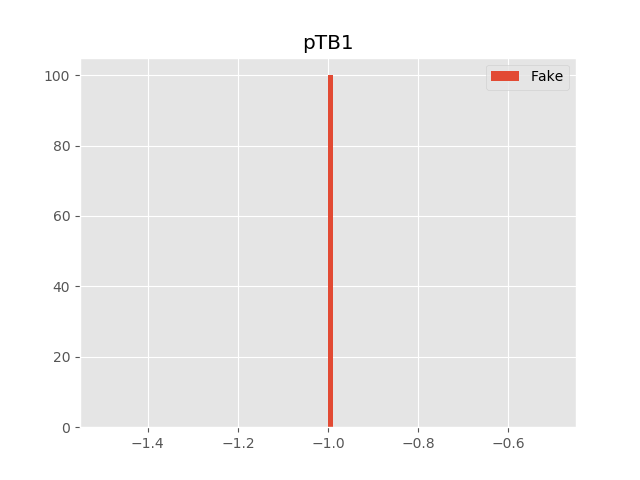

Text(0.5, 1.0, 'pTB1')

In [33]:
plt.figure()
plt.hist(UnscaledpTB["0"], density = True, label = "Fake", bins = 100);
#plt.hist(Real_pTB1, density = True, label = "Real", bins = 40, alpha = 0.5);
plt.legend()
plt.xlim(0,1)
plt.title("pTB1")

<IPython.core.display.Javascript object>


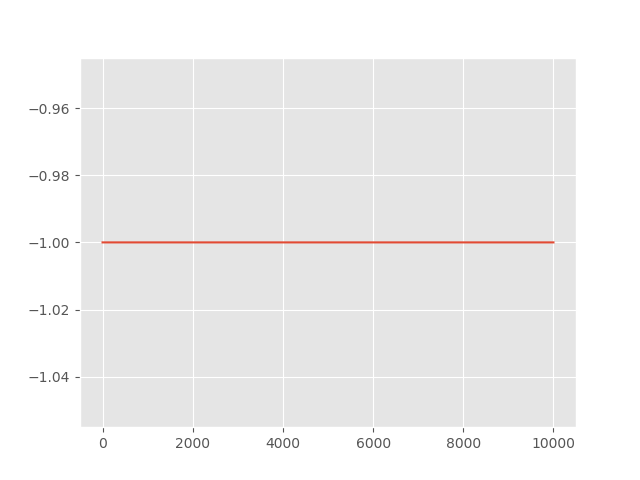

In [34]:
plt.figure()
plt.plot(UnscaledpTB["0"])

<IPython.core.display.Javascript object>


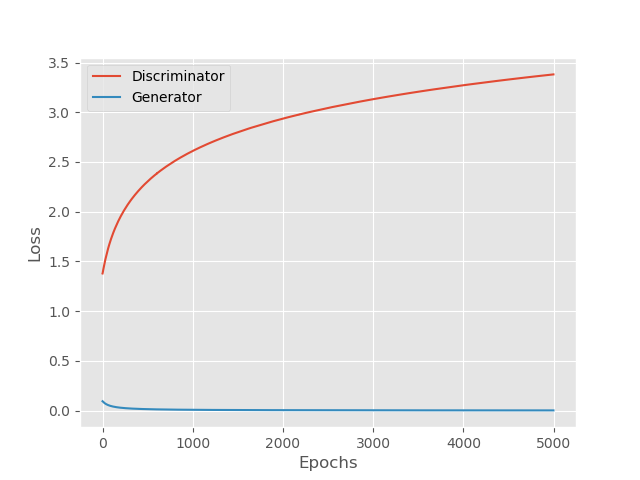

In [2]:
loss = pd.read_csv("ThisIsLossOther.csv")
plt.style.use('ggplot')
plt.figure()
plt.plot(loss['discriminator'], label = "Discriminator")
plt.plot(loss['generator'], label = "Generator")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [3]:
OtherpTB = pd.read_csv("OtherGeneratedEvents.csv")

variables = ['pTB1','pTB2']

dfEven = pd.read_csv('Datasets/VHbb_data_2jet_even.csv')
dfOdd = pd.read_csv('Datasets/VHbb_data_2jet_odd.csv')

Real = pd.concat([dfEven,dfOdd])
Real_pTB1 = Real.loc[Real['category'] == 'VH']['pTB1']
Real_pTB2 = Real.loc[Real['category'] == 'VH']['pTB2']

<IPython.core.display.Javascript object>


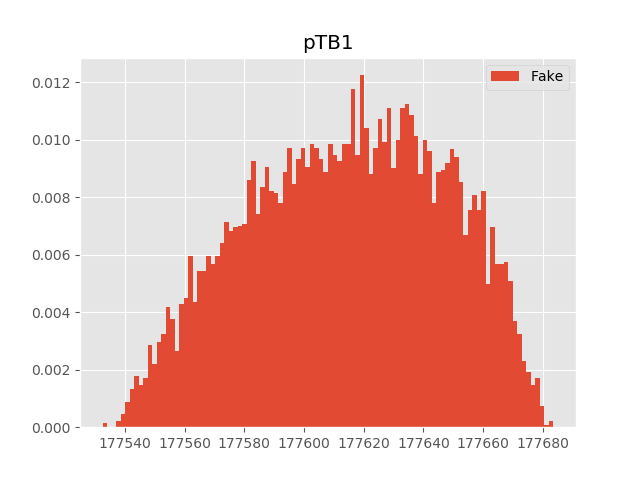

In [32]:
plt.figure()

OtherpTB1 = np.mean(Real_pTB1.to_numpy())/np.mean(OtherpTB["0"].to_numpy())
OtherpTB2 = np.mean(Real_pTB2.to_numpy())/np.mean(OtherpTB["1"].to_numpy())
plt.hist(OtherpTB1*OtherpTB["0"], density = True, label = "Fake", bins = 100);
#plt.hist(Real_pTB1, density = True label = "Real", bins = 100, alpha = 0.5);
plt.legend()
#plt.xlim(0,500000)

plt.title("pTB1");

<IPython.core.display.Javascript object>


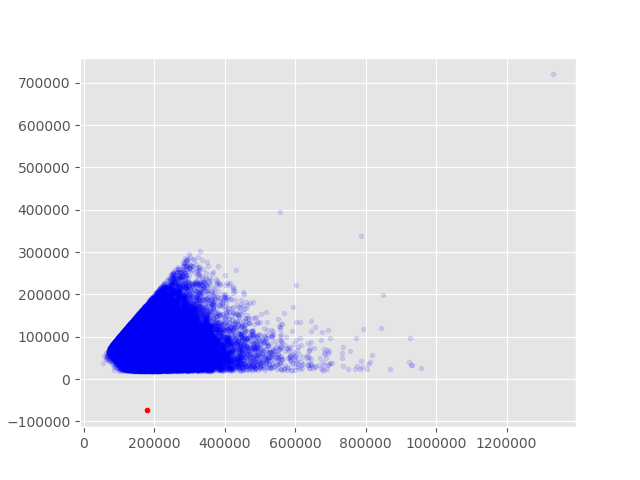

In [33]:
plt.figure()
plt.plot(Real_pTB1, Real_pTB2, "b.", alpha = 0.1)
plt.plot(OtherpTB1,OtherpTB2, "r.")

<IPython.core.display.Javascript object>


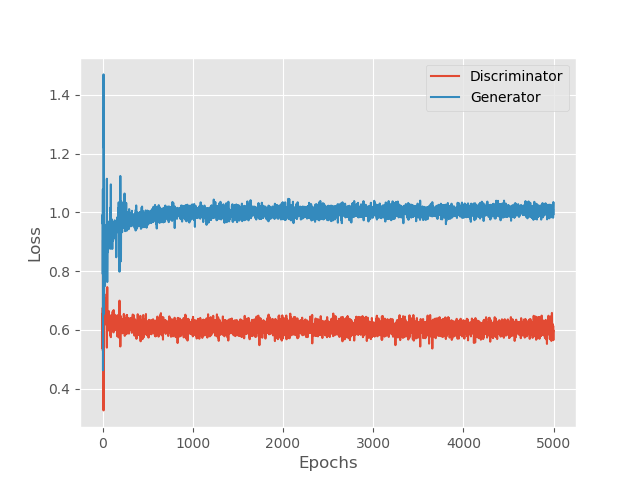

In [3]:
loss = pd.read_csv("ScaledLoss.csv")
plt.style.use('ggplot')
plt.figure()
plt.plot(loss['discriminator'], label = "Discriminator")
plt.plot(loss['generator'], label = "Generator")
plt.ylabel("Loss")
plt.xlabel("Epochs")
#plt.ylim(0,10)
plt.legend();

In [2]:
ScaledpTB = pd.read_csv("ScaledGeneratedEvents.csv")

variables = ['pTB1','pTB2', 'mBB', 'dRBB']

dfEven = pd.read_csv('Datasets/VHbb_data_2jet_even.csv')
dfOdd = pd.read_csv('Datasets/VHbb_data_2jet_odd.csv')

Real = pd.concat([dfEven,dfOdd])

Real = Real.loc[Real['category'] == 'VH']
Real = Real[variables].to_numpy()

scaler = StandardScaler()
Real = scaler.fit_transform(Real).T


#Real_pTB1 = Real.loc[Real['category'] == 'VH']['pTB1']
#Real_pTB2 = Real.loc[Real['category'] == 'VH']['pTB2']
#Real_mBB = Real.loc[Real['category'] == 'VH']['mBB']
#Real_dRBB = Real.loc[Real['category'] == 'VH']['dRBB']
Real_pTB1 = Real[0]
Real_pTB2 = Real[1]
Real_mBB = Real[2]
Real_dRBB = Real[3]


Real_pTB1

array([ 0.30506604,  0.07213462, -0.91494915, ..., -0.65110334,
       -0.15989046,  0.47252415])

<IPython.core.display.Javascript object>


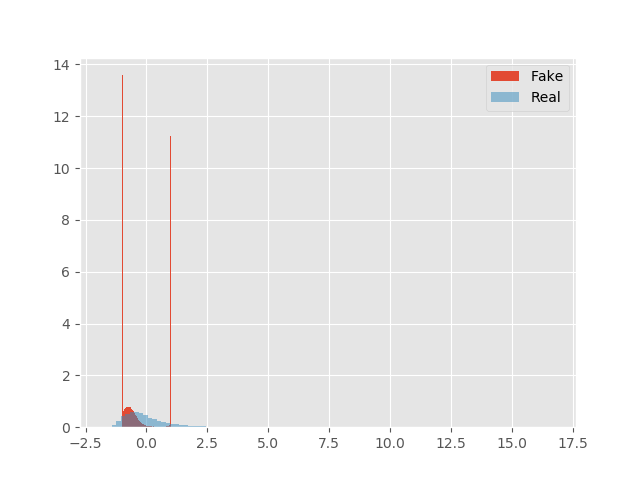

<IPython.core.display.Javascript object>


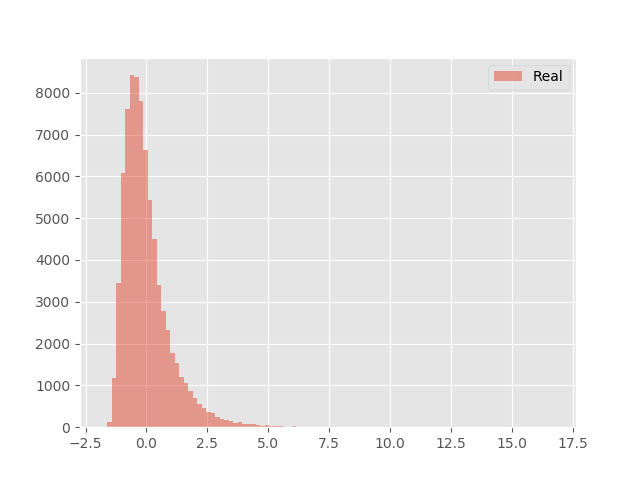

<IPython.core.display.Javascript object>


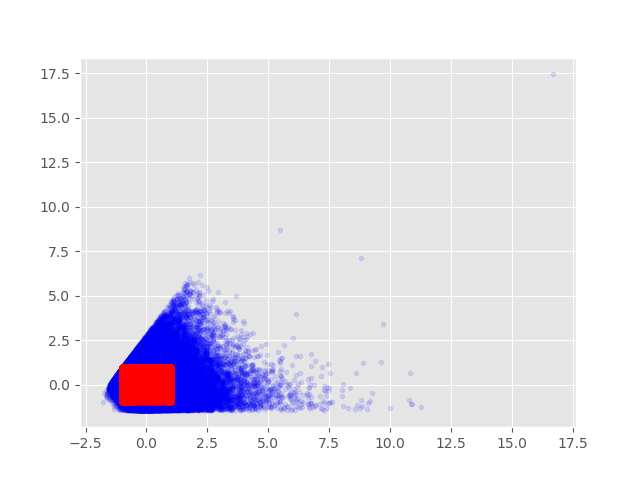

<IPython.core.display.Javascript object>


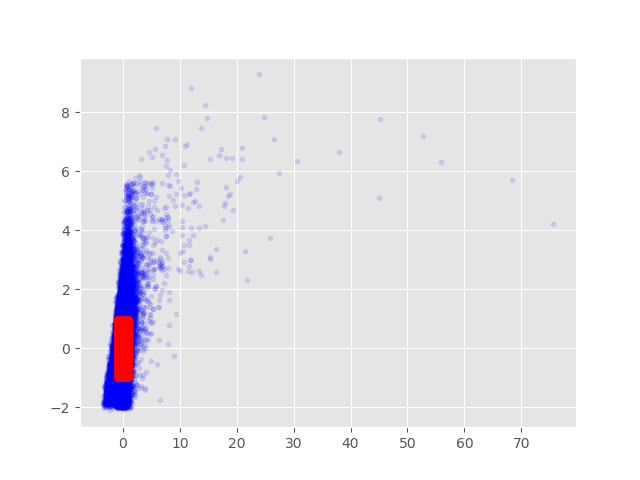

<IPython.core.display.Javascript object>


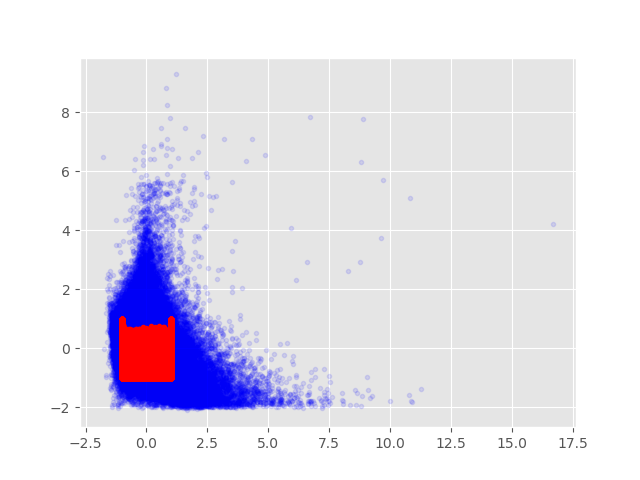

<IPython.core.display.Javascript object>


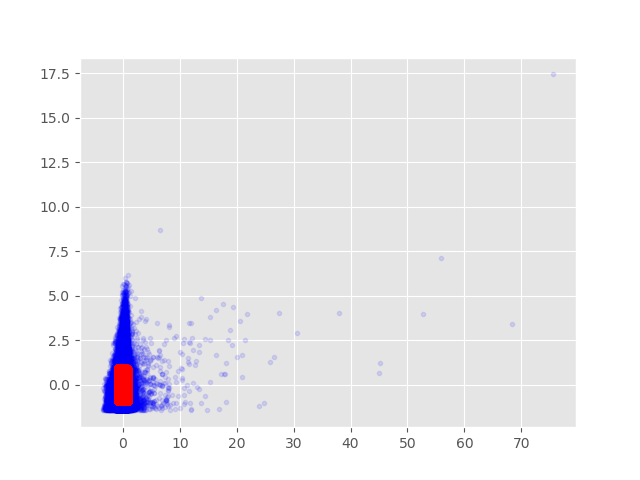

In [49]:

                    

plt.figure()
plt.hist(ScaledpTB["0"], density = True, label = "Fake", bins = 100);
plt.hist(Real_pTB1, density = True, label = "Real", bins = 100, alpha = 0.5);
plt.legend()


plt.figure()
#plt.hist(ScaledpTB["0"], density = False, label = "Fake", bins = 100);
plt.hist(Real_pTB1, density = False, label = "Real", bins = 100, alpha = 0.5);
plt.legend()

plt.figure()
plt.plot(Real_pTB1, Real_pTB2, "b.", alpha = 0.1)
plt.plot(ScaledpTB["0"],ScaledpTB["1"], "r.")

plt.figure()
plt.plot(Real_mBB, Real_dRBB, "b.", alpha = 0.1)
plt.plot(ScaledpTB["2"],ScaledpTB["3"], "r.")

plt.figure()
plt.plot(Real_pTB1, Real_dRBB, "b.", alpha = 0.1)
plt.plot(ScaledpTB["0"],ScaledpTB["3"], "r.")

plt.figure()
plt.plot(Real_mBB, Real_pTB2, "b.", alpha = 0.1)
plt.plot(ScaledpTB["2"],ScaledpTB["1"], "r.")